# Autogen Cheatsheet

## LLM Models

Ref: https://microsoft.github.io/autogen/stable//user-guide/agentchat-user-guide/tutorial/models.html#

### OpenAI Models

In [ ]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

model_client = OpenAIChatCompletionClient(
    model='gpt-4o', 
    api_key=api_key
)

### Gemini Models

In [ ]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()
gemini_api_key = os.getenv('GOOGLE_API_KEY')

model_client = OpenAIChatCompletionClient(
    model="gemini-1.5-flash-8b",
    api_key=gemini_api_key,
)

### Ollama Model

In [ ]:
from autogen_ext.models.ollama import OllamaChatCompletionClient

# Assuming your Ollama server is running locally on port 11434.
ollama_model_client = OllamaChatCompletionClient(model="llama3.2")

### OpenRouter Model Calling

In [5]:
import os
from dotenv import load_dotenv
from autogen_ext.models.openai import OpenAIChatCompletionClient

load_dotenv()

open_router_api_key = os.getenv('OPEN_ROUTER_API_KEY')

model_client =  OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    model="deepseek/deepseek-chat-v3.1:free",
    api_key = open_router_api_key,
    # keep same below
    model_info={
        "family":'deepseek',
        "vision" :True,
        "function_calling":True,
        "json_output": False
    }
)

## Invoking Agents (Assitant Agents (Saving State, Using Pydantic), MultiModal)

### Using Assistant Agent

In [17]:
from autogen_agentchat.agents import AssistantAgent

agent_1 = AssistantAgent(name='my_assistant', model_client=model_client)

result = await agent_1.run(task='Tell me something about you?')
result

TaskResult(messages=[TextMessage(id='2d179b2d-710c-476b-9b42-2b9e06991fe7', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 27, 35, 39285, tzinfo=datetime.timezone.utc), content='Tell me something about you?', type='TextMessage'), TextMessage(id='c50e9b90-deac-43a2-b491-25fc9234fcbf', source='my_assistant', models_usage=RequestUsage(prompt_tokens=30, completion_tokens=63), metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 27, 35, 737252, tzinfo=datetime.timezone.utc), content="I am a large language model, trained by Google.  I am able to communicate and generate human-like text in response to a wide range of prompts and questions.  My knowledge cutoff is September 2021, meaning I don't have information about events after that date.\n\nTERMINATE\n", type='TextMessage')], stop_reason=None)

In [18]:
print(result.messages[-1].content)

I am a large language model, trained by Google.  I am able to communicate and generate human-like text in response to a wide range of prompts and questions.  My knowledge cutoff is September 2021, meaning I don't have information about events after that date.

TERMINATE



#### Saving Current State

In [10]:
agent_state = await agent_1.save_state()
print(agent_state)

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'Tell me something about you?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'I am an AI assistant designed to provide helpful, accurate, and thoughtful responses to a wide range of queries. I can assist with information retrieval, problem-solving, creative writing, language translation, and more. My knowledge is based on a diverse dataset, and I aim to be respectful, clear, and engaging in my interactions. Feel free to ask me anything!', 'thought': None, 'source': 'my_assistant', 'type': 'AssistantMessage'}]}}


#### Using Pydantic With Agents

In [11]:
# Pydantic Class

from pydantic import BaseModel

class PlanetInfo(BaseModel):
    name:str
    color:str
    distance:str

In [13]:
# Calling LLM with Pydantic

from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()
gemini_api_key = os.getenv('GOOGLE_API_KEY')

structured_model_client = OpenAIChatCompletionClient(
    model="gemini-1.5-flash-8b",
    api_key=gemini_api_key,
    response_format=PlanetInfo
)

In [ ]:
# Creating Agent
from autogen_agentchat.agents import AssistantAgent

agent_2 = AssistantAgent(name='my_assistant2',model_client=structured_model_client)

result = await agent_2.run(task='Tell me about Sun')
print(result)

messages=[TextMessage(id='fbdd0380-c2d9-4854-9b4a-f3a54126b66d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 19, 38, 738294, tzinfo=datetime.timezone.utc), content='Tell me about Sun', type='TextMessage'), TextMessage(id='64c69c0d-6625-43b8-8ca8-43e22ef084d1', source='my_assistant2', models_usage=RequestUsage(prompt_tokens=38, completion_tokens=22), metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 19, 39, 245426, tzinfo=datetime.timezone.utc), content='{"name": "Sun", "color": "yellow", "distance": "150 million kilometers"}', type='TextMessage')] stop_reason=None


In [16]:
print(result.messages[-1].content)

{"name": "Sun", "color": "yellow", "distance": "150 million kilometers"}


### Multimodal Agent Calling

In [ ]:
# Calling LLM

from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()
gemini_api_key = os.getenv('GOOGLE_API_KEY')

model_client = OpenAIChatCompletionClient(
    model="gemini-1.5-flash-8b",
    api_key=gemini_api_key
    )


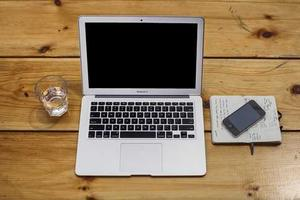

In [ ]:
from io import BytesIO
import PIL
import requests
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/id/9/300/200").content))
img = Image(pil_image)
img

In [ ]:
from autogen_agentchat.messages import MultiModalMessage
from autogen_agentchat.agents import AssistantAgent

agent_3 = AssistantAgent(name='my_assistant3',model_client=model_client)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")

result = await agent_3.run(task=multi_modal_message)
print(result)

messages=[MultiModalMessage(id='9b06919d-8778-4f66-b159-ab7a63f8e317', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 35, 48, 782608, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x000001D1B9BC0690>], type='MultiModalMessage'), TextMessage(id='ea1001ab-4f53-47aa-9926-4b7229d70207', source='my_assistant3', models_usage=RequestUsage(prompt_tokens=291, completion_tokens=74), metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 35, 50, 304630, tzinfo=datetime.timezone.utc), content='The image shows a laptop computer, a glass of water, a notepad, and a phone on a wooden table.  The laptop is a light silver color with a black screen. The notepad is light beige with writing on it and a pen is also visible. The glass appears to be filled with clear liquid.  The wood table is light brown.\n\nTERMINATE\n', type='TextMessage')] stop_reason=None


In [26]:
print(result.messages[-1].content)

The image shows a laptop computer, a glass of water, a notepad, and a phone on a wooden table.  The laptop is a light silver color with a black screen. The notepad is light beige with writing on it and a pen is also visible. The glass appears to be filled with clear liquid.  The wood table is light brown.

TERMINATE



## Tools

### Custom Tools

In [ ]:
import asyncio
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_core.tools import FunctionTool
import os
from dotenv import load_dotenv

## LLM

open_router_api_key = os.getenv('OPEN_ROUTER_API_KEY')

model_client =  OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    model="deepseek/deepseek-chat-v3.1:free",
    api_key = open_router_api_key,
    model_info={
        "family":'deepseek',
        "vision" :True,
        "function_calling":True,
        "json_output": False
    }
)


## Custom Function

def reverse_string(text: str) -> str:
    '''
    Reverse the given text

    input:str

    output:str

    The reverse string is returned.
    '''
    return "Hello how are you?"

reverse_tool = FunctionTool(reverse_string,description='A tool to reverse a string')

# reflect_on_tool_use = True, RETHINKS

agent = AssistantAgent(
    name="ReverseStringAgent",
    model_client= model_client,
    system_message='You are a helpful assistant that can reverse string using reverse_string tool. Give the result with summary',
    tools=[reverse_tool],
    reflect_on_tool_use=True # Checks the output and rethinks
)

result = await agent.run(task = 'Reverse the string "Hello, World!"')

print(result)

print(result.messages[-1].content)

g:\AgenticAI-Autogen\autogen-venv\Lib\site-packages\autogen_ext\models\openai\_openai_client.py:453: UserWarning: Missing required field 'structured_output' in ModelInfo. This field will be required in a future version of AutoGen.
  validate_model_info(self._model_info)


messages=[TextMessage(id='a781aafb-95d9-47e8-8fa8-1f791e212e4d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 51, 7, 367194, tzinfo=datetime.timezone.utc), content='Reverse the string "Hello, World!"', type='TextMessage'), ThoughtEvent(id='834e0697-3ac6-41a5-a8f2-1782711f3991', source='ReverseStringAgent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 51, 9, 699676, tzinfo=datetime.timezone.utc), content='I\'ll reverse the string "Hello, World!" for you.', type='ThoughtEvent'), ToolCallRequestEvent(id='888026b4-ff2f-4bfc-8ea6-ec26d5ae4b64', source='ReverseStringAgent', models_usage=RequestUsage(prompt_tokens=185, completion_tokens=30), metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 51, 9, 699782, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_af2d', arguments='{"text": "Hello, World!"}', name='reverse_string')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='efbc1252-4198-4

In [ ]:
# reflect_on_tool_use = False, DOESN'T RETHINK

agent2 = AssistantAgent(
    name="ReverseStringAgent",
    model_client= model_client,
    system_message='You are a helpful assistant that can reverse string using reverse_string tool. Give the result with summary',
    tools=[reverse_tool],
    reflect_on_tool_use=False # Checks the output and rethinks
)

result = await agent2.run(task = 'Reverse the string "Hello, World!"')

print(result)

print(result.messages[-1].content)

messages=[TextMessage(id='36e26f63-7523-4b0d-a41e-a54b246deaf4', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 52, 7, 963376, tzinfo=datetime.timezone.utc), content='Reverse the string "Hello, World!"', type='TextMessage'), ThoughtEvent(id='dab5be91-3017-4157-85b8-a6854e55f752', source='ReverseStringAgent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 52, 9, 397022, tzinfo=datetime.timezone.utc), content='I\'ll reverse the string "Hello, World!" for you.', type='ThoughtEvent'), ToolCallRequestEvent(id='3fefd527-0136-4c83-8253-40b5e8ec3e5a', source='ReverseStringAgent', models_usage=RequestUsage(prompt_tokens=185, completion_tokens=30), metadata={}, created_at=datetime.datetime(2025, 9, 7, 16, 52, 9, 397119, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_94df', arguments='{"text": "Hello, World!"}', name='reverse_string')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='595e6fbe-f331-4